In [1]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# YOLOv5 model and utitlities
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

/home/dai/anaconda3/envs/dnn/lib/python3.11/site-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/dai/.cache/torch/hub/master.zip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 15.3 MB/s eta 0:00:00:00:0100:01


/home/dai/anaconda3/envs/dnn/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
requirements: ❌ AutoUpdate skipped (offline)


YOLOv5 🚀 2023-12-29 Python-3.11.5 torch-2.1.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 83.5MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [15]:
image = plt.imread('../images/jungle.jpg')
results = model(image)
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 476x640 3 zebras, 1 giraffe
Speed: 3.1ms pre-process, 158.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)

In [16]:
results.render()

[array([[[ 31,  42,  10],
         [ 41,  52,  20],
         [ 11,  22,   0],
         ...,
         [ 47,  63,  14],
         [ 80,  96,  47],
         [ 57,  74,  22]],
 
        [[ 15,  26,   0],
         [  8,  19,   0],
         [ 40,  51,  21],
         ...,
         [ 55,  71,  22],
         [ 36,  53,   1],
         [ 63,  80,  28]],
 
        [[ 25,  36,   6],
         [ 12,  23,   0],
         [ 31,  42,  12],
         ...,
         [ 37,  51,   2],
         [120, 134,  83],
         [ 39,  53,   2]],
 
        ...,
 
        [[ 96, 108,  34],
         [ 98, 110,  36],
         [100, 112,  38],
         ...,
         [109, 116,  38],
         [112, 119,  41],
         [110, 117,  37]],
 
        [[104, 118,  41],
         [104, 118,  41],
         [105, 119,  44],
         ...,
         [110, 117,  39],
         [106, 113,  33],
         [117, 125,  42]],
 
        [[116, 130,  53],
         [114, 128,  51],
         [114, 128,  53],
         ...,
         [119, 126,  46],
  

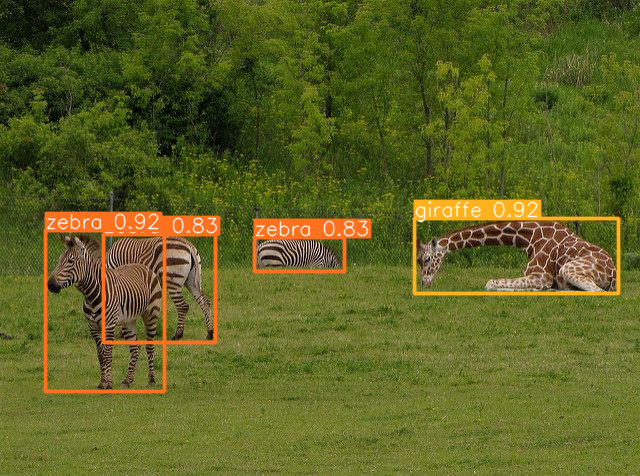

In [17]:
# Display images with predicted bounding boxes and labels
results.show()